# Predicción de precios de carros

En este proyecto vamos a crear un modelo para predecir el precio de carros usando datos recolectados por Jeffrey C. Schlimmer, los cuales pueden ser descargados en el [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile).

## Explorar los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Datos numéricos

Vamos a seleccionar únicamente las columnas que tienen datos numéricos.

In [3]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 
                'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_numeric = cars[numeric_cols]
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Datos faltantes
Algunas columnas tienen como valor '?', indicando que el valor falta. Vamos a cambiar esto a NaNs para identificar qué tantos datos faltan.

In [4]:
cars_numeric = cars_numeric.replace('?', np.nan)

In [5]:
cars_numeric = cars_numeric.astype('float')
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Valores nulos

In [6]:
cars_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Como el precio es lo que se quiere predecir, vamos a remover los registros que no tienen precio.

In [7]:
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
cars_numeric.shape

(201, 14)

Como sólo tenemos 201 registros, remover los registros con casillas nulas resultaría en una pérdida de muchos datos. Vamos a remplazar los datos nulos con el promedio de sus respectivas columnas.

In [9]:
cars_numeric = cars_numeric.fillna(cars_numeric.mean())
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Normalización de los datos

Vamos a normalizar todos los datos para que varíen entre 0 y 1.

In [10]:
prices = cars_numeric['price']
cars_numeric = (cars_numeric - cars_numeric.min()) / (cars_numeric.max() - cars_numeric.min())
cars_numeric['price'] = prices 
cars_numeric.sample(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
187,0.151832,0.311953,0.456716,0.444444,0.658333,0.322343,0.335714,0.633333,1.00000,0.093458,0.142857,0.666667,0.684211,9495.0
147,0.125654,0.303207,0.483582,0.435897,0.433333,0.375097,0.771429,0.271429,0.12500,0.214953,0.428571,0.333333,0.394737,10198.0
181,0.298429,0.521866,0.697015,0.529915,0.525000,0.645074,0.521429,0.609524,0.13750,0.504673,0.428571,0.166667,0.210526,15750.0
198,0.198953,0.516035,0.711940,0.589744,0.700000,0.603957,0.771429,0.514286,0.03125,0.532710,0.387755,0.111111,0.157895,18420.0
22,0.277487,0.206997,0.241791,0.299145,0.250000,0.150504,0.307143,0.552381,0.15000,0.093458,0.551020,0.500000,0.578947,6377.0


## KNN univariado
Vamos a empezar con k-vecinos cercanos usando únicamente una columna para predecir los precios.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

Primero creamos una función que admite el feature o columna sobre el cual se va a entrenar el modelo y retorna el error cuadrático medio del modelo.

In [12]:
def knn_train_test(feature, target, df, k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    
    # Mezclar los datos
    shuffle = np.random.permutation(df.index)
    shuffle_df = df.reindex(shuffle)
    
    # Train y test (50% - 50%)
    split_index = round(len(shuffle_df) / 2)
    
    train = shuffle_df.iloc[:split_index]
    test = shuffle_df.iloc[split_index:]
    
    # Entrenar el modelo
    knn.fit(train[[feature]], train[target])
    
    # Hacer predicciones
    prediction = knn.predict(test[[feature]])
    
    # Calcular error MSE
    mse = mean_squared_error(test[target], prediction)
    # Error RMSE
    rmse = np.sqrt(mse)
    
    return rmse

Ahora vamos a generar predicciones para cada una de las columnas.

In [13]:
rmse_by_feature = {}
features = cars_numeric.columns.drop('price')

for feature in features:
    rmse = knn_train_test(feature, 'price', cars_numeric)
    rmse_by_feature[feature] = rmse
    
rmse_by_feature = pd.Series(rmse_by_feature)
rmse_by_feature.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Usando el parámetro por defecto de $k=5$ vecinos cercanos, la columna con menor error RMSE es `horsepower`.

Ahora vamos a considerar diferentes posibilidades para el parámtero $k$, aún usando únicamente una columna para predecir el precio.

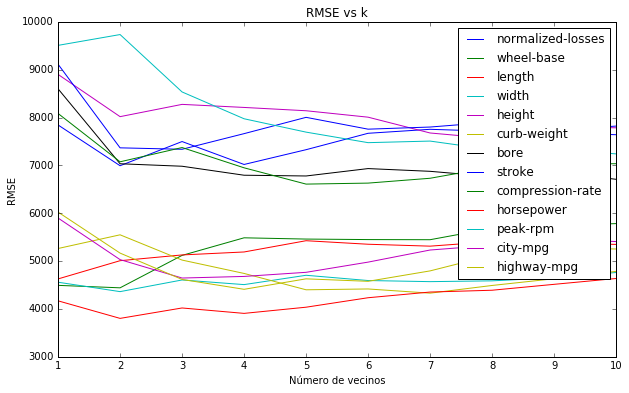

In [14]:
k_values = list(range(1, 11))
results = pd.DataFrame(columns=features, index=k_values)

for feature in features:
    for k in k_values:
        rmse = knn_train_test(feature, 'price', cars_numeric, k=k)
        results.loc[k, feature] = rmse
        
plt.figure(figsize=(10,6))
for col in results.columns:
    plt.plot(results[col], label=col)
    
plt.legend()
plt.title('RMSE vs k')
plt.ylabel('RMSE')
plt.xlabel('Número de vecinos')

Vamos a calcuar para cada feature, el promedio de los RMSE encontrados, los cuales son tantos como el número de opciones para $k$ que consideramos.

In [15]:
avg_rmse = results.mean()
best_features = avg_rmse.sort_values()
best_features

horsepower           4207.168580
width                4591.181459
curb-weight          4763.975507
highway-mpg          4988.282518
city-mpg             5144.573396
length               5219.454161
wheel-base           5311.459809
bore                 7035.816667
compression-rate     7049.162718
normalized-losses    7516.994301
stroke               7852.547403
peak-rpm             8036.071363
height               8041.409912
dtype: float64

## Modelo multivariado
Vamos a modificar el modelo para que acepte varias columnas para predecir los precios de los carros.

In [16]:
def knn_train_test(features, target, df, k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    
    # Mezclar los datos
    shuffle = np.random.permutation(df.index)
    shuffle_df = df.reindex(shuffle)
    
    # Train y test (50% - 50%)
    split_index = round(len(shuffle_df) / 2)
    
    train = shuffle_df.iloc[:split_index]
    test = shuffle_df.iloc[split_index:]
    
    # Entrenar el modelo
    knn.fit(train[features], train[target])
    
    # Hacer predicciones
    prediction = knn.predict(test[features])
    
    # Calcular error MSE
    mse = mean_squared_error(test[target], prediction)
    # Error RMSE
    rmse = np.sqrt(mse)
    
    return rmse

Vamos a probar el modelo multivariado usando las mejores 2, 3, 4 y hasta 5 features según lo que encontramos anteriormente.

In [17]:
best_names = best_features.index

for i in range(2, 7):
    features = best_names[:i]
    rmse = knn_train_test(features, 'price', cars_numeric)
    print('{n} best features RMSE: {r:,.2f}'.format(n=i, r=rmse))

2 best features RMSE: 3,589.31
3 best features RMSE: 3,305.94
4 best features RMSE: 3,358.69
5 best features RMSE: 3,341.60
6 best features RMSE: 3,628.26


Usando el parámetro $k=5$, se alcanza un menor RMSE usando las mejores 3 features, que fueron rankeadas anteriormente. Estas son `horsepower`, `width` y `curb-weight`.

## Ajuste de los hiperparámetros
El anterior análisis se hizo usando únicamente los 5 vecinos más cercanos. 

Vamos a restringirnos en los 3 modelos de mejor desempeño en el caso anterior. Para cada uno vamos a encontrar su valor óptimo para el número de vecinos $k$.

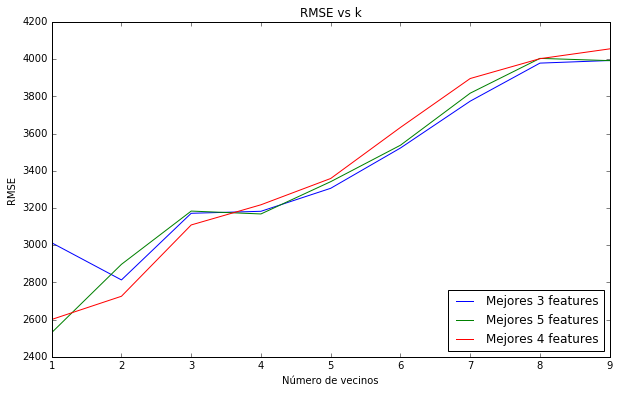

In [18]:
k_vals = list(range(1, 10))

results_2 = pd.DataFrame(columns=[3, 5, 4], index=k_vals)


for col in results_2.columns:
    features = best_names[:col]
    for k in k_vals:
        rmse = knn_train_test(features, 'price', cars_numeric, k=k)
        results_2.loc[k, col] = rmse

plt.figure(figsize=(10,6))
for col in results_2.columns:
    plt.plot(results_2[col], label='Mejores {} features'.format(col))
    
plt.legend(loc='lower right')
plt.xlabel('Número de vecinos')
plt.ylabel('RMSE')
plt.title('RMSE vs k')

Los valores óptimos para $k$ según el modelo son los siguientes:

- Mejores 4 features: $k=1$
- Mejores 5 features: $k=1$
- Mejores 3 features: $k=2$

## Conclusión
El modelo más acertado para predecir los precios fue aquel que usaba los datos de `horsepower, width, curb-weight, highway-mpg, city-mpg` y $k=1$ vecino cercano.